In [2]:
# loading libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

# 1) Data Description
### Code Portion

In [3]:
# reading files
players <- read_csv("https://raw.githubusercontent.com/angelinahang/dsci-100-2025w1-project-personal-plan/refs/heads/main/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/angelinahang/dsci-100-2025w1-project-personal-plan/refs/heads/main/sessions.csv")

players
sessions


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


In [4]:
# summary statistics: players data
# first: quantitative variables: played hours, age
#    Age has NA values!!
# typical ways to describe quantitative variables in stats:
#    center (mean and median) and spread (range, SD)
# will focus on mean and SD

players_data_summary <- players |>
    summarize(players_hrs_mean = round(mean(played_hours), 2),
                players_hrs_sd = round(sd(played_hours), 2),
                players_age_mean = round(mean(Age, na.rm = TRUE), 2),
                players_age_sd = round(sd(Age, na.rm = TRUE), 2))
players_data_summary

players_ranges <- players |>
    summarize(players_hrs_range = range(played_hours),
              players_age_range = range(Age, na.rm = TRUE))
players_ranges

players_hrs_mean,players_hrs_sd,players_age_mean,players_age_sd
<dbl>,<dbl>,<dbl>,<dbl>
5.85,28.36,21.14,7.39


Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”


players_hrs_range,players_age_range
<dbl>,<dbl>
0.0,9
223.1,58


In [6]:
# summary statistics: sessions data
# first: quantitative variables: original_start_time, original_end_time
#    original_end_time has NA values!! 
# shorthand for original: og
# typical ways to describe quantitative variables in stats:
#    center (mean and median) and spread (range, SD)
# will focus on mean and SD

sessions_summary <- sessions |>
    summarize(og_start_mean = round(mean(original_start_time), 2),
              og_start_sd = round(sd(original_start_time), 2),
              og_end_mean = round(mean(original_end_time, na.rm = TRUE), 2),
              og_end_sd = round(sd(original_end_time, na.rm = TRUE), 2))
sessions_summary


og_start_mean,og_start_sd,og_end_mean,og_end_sd
<dbl>,<dbl>,<dbl>,<dbl>
1.719201e+12,3557491589,1.719196e+12,3552813134


### Written Portion

**General information about the study**: A UBC research group has collected data about how people play video games through a Minecraft server called PLAIcraft. PLAIcraft recorded details like the player's age, experience level, start and end time, etc.

**players.csv data**
- number of observations: 196
- number of variables: 7
- summary statistics (for `played_hours` variable)
    - mean = 5.85 hours
    - standard deviation = 21.14
    - range = 223.1 - 0.0 = 223.1
- summary statistics (for `Age` variable)
    - mean = 21.14 years old
    - standard deviation = 7.39
    - range = 58 - 9 = 39

| **Variable Name** | **Variable Type** | **Meaning of Variable** | **Issues (current and potential)** |
|--------------------|-------------------|---------------------------|------------------------------------|
| `experience` | character | Categories include Amateur, Beginner, Regular, Pro, and Veteran | Labels are self-reported, which can result in players over- or underestimating their experience level. |
| `subscribe` | logical | TRUE = player has subscribed to the newsletter, FALSE = player hasn't subscribed |  |
| `hashedEmail` | character | Identity that's unique to each player, used in `sessions.csv` dataset as well |  |
| `played_hours` | double | Total number of hours the player has played | Without metadata, cannot tell if 0.0 means the player did not play the game at all, or they played the game for <0.05 hours and this is the rounded value. |
| `name` | character | Player's username |  |
| `gender` | character | Gender the player identifies with |  |
| `Age` | double | Player's age (years) | Some N/A entries found. |


**sessions.csv data**
- number of observations: 1535
- number of variables: 5
- summary statistics (for `original_start_time` variable)
    - mean =  1.72e+12
    - standard deviation = 3557491589	
- summary statistics (for `original_end_time` variable)
    - mean = 1.72e+12
    - standard deviation = 3552813134

| **Variable Name** | **Variable Type** | **Meaning of Variable** | **Issues (current and potential)** |
|--------------------|-------------------|---------------------------|------------------------------------|
| `hashedEmail` | character | Identity that's unique to each player||
| `start_time` | character | Timestamp for start time formatted as (DD/MM/YYYY<br>HH:MM) | Untidy because technically there are two variables within one cell (date and time) |
| `end_time` | character | Timestamp for end time formatted as (DD/MM/YYYY<br>HH:MM) | See above |
| `original_start_time` | double | Start time in milliseconds (UNIX timestamp) | Due to rounding being too high, start and end time seem identical |
| `original_end_time` | double| End time in milliseconds (UNIX timestamp) | See above |


# 2) Questions
**Broad question I will address:** <br> Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**My specific question:** <br> Can `Age` predict `subscribe`, and how does this prediction differ between different `experience` levels? <br> 
- will only use the `players` dataset, because it provides the age (if given) of a player and their subscriber status.
    - this info will be used to train a KNN model that predicts `subscribe` based on `Age`.
- `players` data is already tidy (see section 3)


# 3) Exploratory Data Analysis and Visualization


### Code portion

In [8]:
# Players data is already tidy:
#    - one row per variable
#    - one column per observation
#    - each cell has a single measurement
# However, `Age` does have N/A variables, which I will remove before making visualizations.

#removing N/A variables
players <- players |>
filter(!is.na(Age))


In [53]:
# recap: mean of each quantitative variable in players data
players_mean_vars <- players |>
    summarize(players_hrs_mean = round(mean(played_hours), 2),
              players_age_mean = round(mean(Age, na.rm = TRUE), 2))
players_mean_vars

players_hrs_mean,players_hrs_sd,players_age_mean
<dbl>,<dbl>,<dbl>
5.85,28.36,21.14


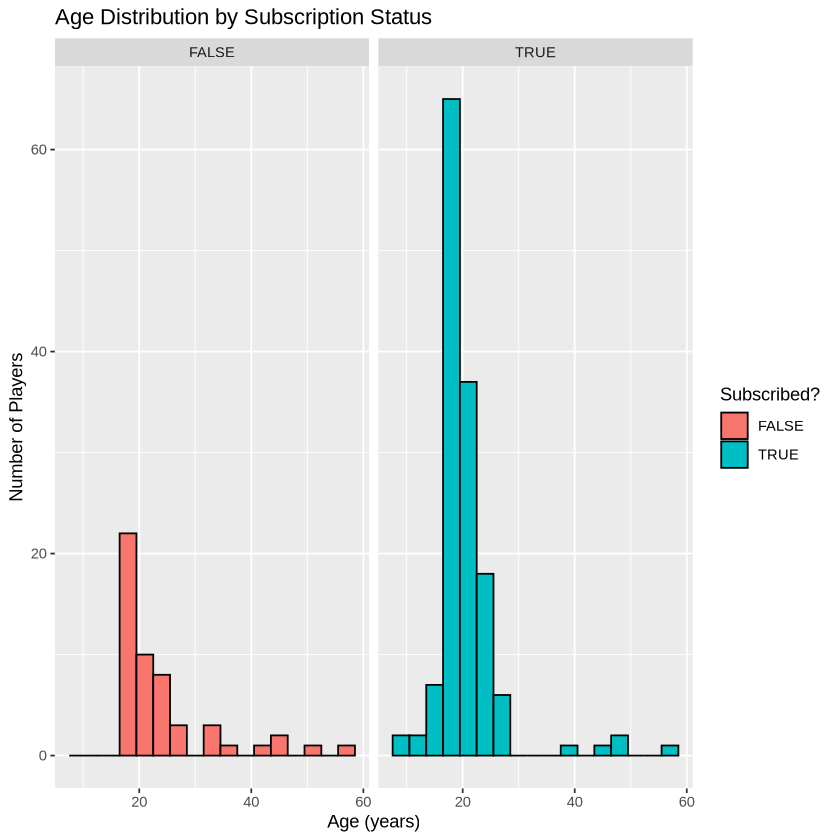

In [7]:
# First visualization: faceted histogram, showing distribution of age by
# subscription status.
age_subscribe <- ggplot(players, aes(x = Age, fill = subscribe)) +
  geom_histogram(binwidth = 3, color = "black") +
  facet_wrap(~ as.factor(subscribe)) +
  labs(
    title = "Age Distribution by Subscription Status",
    x = "Age (years)",
    y = "Number of Players",
    fill = "Subscribed?"
  )
age_subscribe

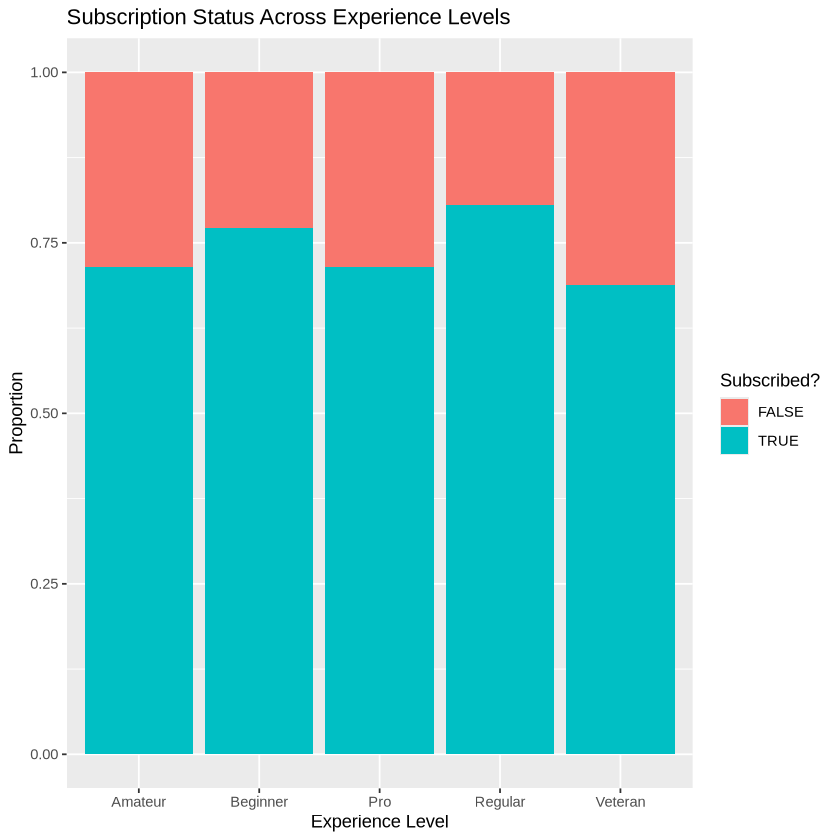

In [44]:
# Second visualization: bar graph comparing the proportion of subscribers within each
# experience level.

experience_subscribe <- ggplot(players_data, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "fill") +
  labs(
    title = "Subscription Status Across Experience Levels",
    x = "Experience Level",
    y = "Proportion of Players",
    fill = "Subscribed?"
  )
experience_subscribe

### Written portion:
**Visualization 1** <br> From the histogram, subscribers cluster at younger ages, while non-subscribers appear slightly older on average.

**Visualization 2** <br> Subscribers make up a larger share of players across all experience levels, though the size of this gap varies.

# 4) Methods and Plan
- **method**: will use a KNN classification model because it is a common method to predict labels, and I have assumed that my data is non-linear (needs to be verified).

- **limitations**: The age distribution of subscribers shows no clear trend, so choosing an optimal K might be difficult. Incorporating another predictor, such as `played_hours`, may be necessary.


- **scaling**: standardize (center and scale) `Age`

- **data splitting**: Split `players` into training (70%) and test (30%) tests

- **validation**: use 5-fold cross-validation on training data to find the best K value. Criteria will be based on accuracy, recall and precision.

- **prediction**: using the best k value, apply the final KNN model on the test set and evaluate its performance.

# 5) Github Link
https://github.com/angelinahang/dsci-100-2025w1-project-personal-plan-group-42

